# Explorative Data Analysis on ZORI Prices

Source url = https://www.zillow.com/research/data/

Description: Zillow ZORI over time based on zillow rent prices per zip code in U.S. in urban areas

### Import CSV and Prelim Info

Used pandas to import csv and checked properties of my data


In [71]:
import pandas as pd

df = pd.read_csv('data/zillow_zori_data_june25.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Columns: 135 entries, RegionID to 2025-06-30
dtypes: float64(126), int64(3), object(6)
memory usage: 7.7+ MB


,RegionID,SizeRank,RegionName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
count,7488.000000,7488.000000,7488.000000,819.000000,850.000000,905.000000,919.000000,935.000000,939.000000,944.000000,...,5461.000000,5530.000000,5560.000000,5700.000000,5960.000000,6114.000000,6445.000000,6635.000000,6973.000000,7487.000000
mean,85065.756811,4625.064103,53029.639824,1352.573432,1359.711959,1373.067541,1385.143499,1392.676804,1404.362190,1408.176399,...,2076.488934,2072.634355,2062.933188,2079.293281,2083.270021,2093.446699,2114.049428,2119.999903,2123.340702,2131.124068
std,43589.858253,3480.894180,29951.454889,595.423060,595.553429,594.596807,601.213921,606.319343,614.099924,615.104638,...,1601.489678,1578.393095,1225.842765,1789.984568,1782.476052,1758.225613,1752.556686,1716.640183,1338.102094,1618.793870
min,58197.000000,1.000000,1002.000000,538.440948,545.295848,542.053351,545.765424,544.880256,556.891947,558.993141,...,661.110269,665.012813,652.779912,640.473475,632.448322,656.509498,647.643985,661.259087,687.517525,597.500000
25%,70521.000000,1954.000000,29463.250000,976.734989,984.401517,995.227085,1002.755835,1009.821083,1017.590353,1019.152553,...,1526.314864,1523.493625,1522.325002,1518.528955,1521.827220,1525.039953,1536.700420,1544.229672,1545.351857,1539.307540
50%,80075.500000,4037.000000,49367.000000,1194.630885,1198.341038,1219.387609,1234.201115,1236.539017,1247.840851,1249.512610,...,1877.091192,1873.731041,1871.832959,1867.936188,1869.565224,1881.487023,1897.637804,1903.996689,1907.680541,1908.913158
75%,93311.250000,6546.250000,80120.250000,1518.814488,1514.610828,1534.056343,1562.236879,1576.626304,1586.474634,1597.759411,...,2374.738131,2372.975538,2376.327401,2370.353202,2381.447847,2390.213406,2422.895837,2429.345345,2441.982092,2448.783730
max,845914.000000,30490.000000,99801.000000,5455.439886,5503.147919,5701.815492,5989.722506,6176.286250,6247.457978,6313.455470,...,81320.690294,80255.683964,44003.520256,99305.173426,100315.221457,96853.856198,96645.253568,96722.197098,46242.809639,83611.111111


### Clean Data

Melted the date so all dates are one column

In [72]:
import re

def camel_to_snake(name):
    name = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name)
    return name.lower()

df_melted = df.melt(id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName','State','City','Metro','CountyName'], var_name='date', value_name='zori')

df_cleaned = df_melted.drop(columns=['RegionID', 'StateName', 'RegionType'])

df_cleaned = df_cleaned.dropna(subset=['zori'])

df_cleaned = df_cleaned.drop_duplicates()

df_cleaned.columns = [camel_to_snake(col) for col in df_cleaned.columns]

df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

df_cleaned

,size_rank,region_name,state,city,metro,county_name,date,zori
0,1,77494,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2015-01-31,1637.577077
1,3,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2015-01-31,1317.783156
2,5,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2015-01-31,1187.931729
5,8,78660,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,2015-01-31,1275.521672
8,11,77433,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,2015-01-31,1354.979126
...,...,...,...,...,...,...,...,...
943483,30158,89158,NV,Las Vegas,"Las Vegas-Henderson-Paradise, NV",Clark County,2025-06-30,2875.000000
943484,30470,64102,MO,Kansas City,"Kansas City, MO-KS",Jackson County,2025-06-30,1387.500000
943485,30490,10004,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,2025-06-30,4840.079365
943486,30490,76005,TX,Arlington,"Dallas-Fort Worth-Arlington, TX",Tarrant County,2025-06-30,2175.388889


### Exploratory Data Analysis

Histogram of distribution of a year

Time Series for a zip code

Barchart for the counts for each state

/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_4689/1342625952.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=table, x='State', y='RegionName', palette='viridis')


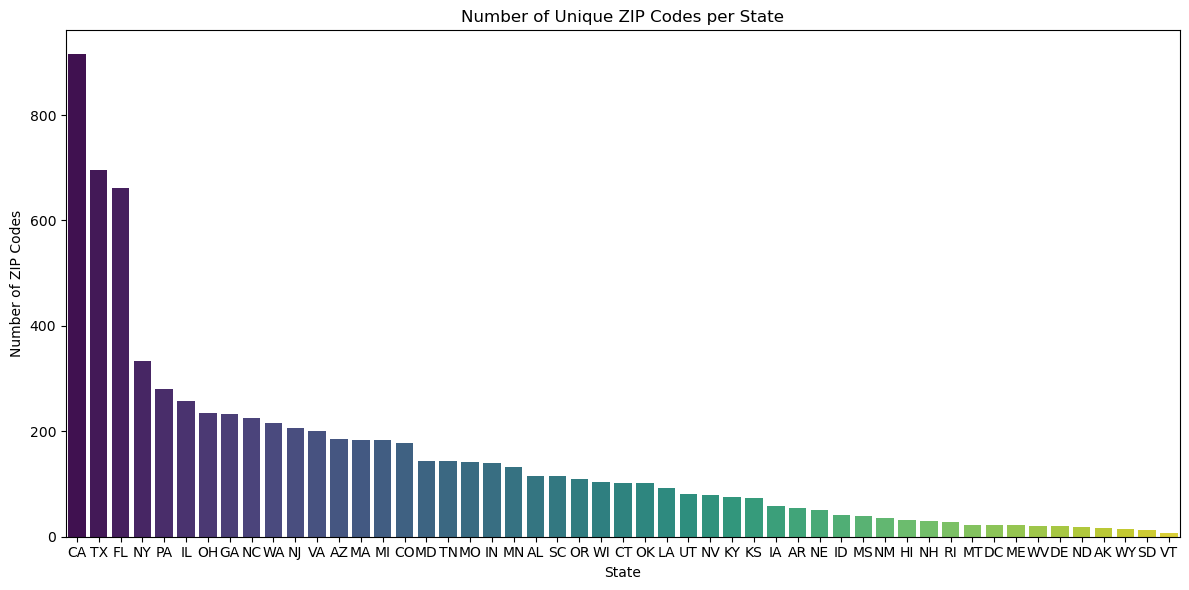

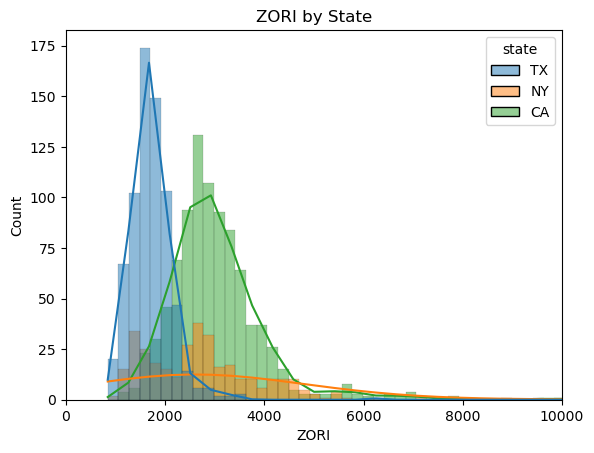

/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_4689/1342625952.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=table_for_bar, x='state', y='zori', palette='viridis')


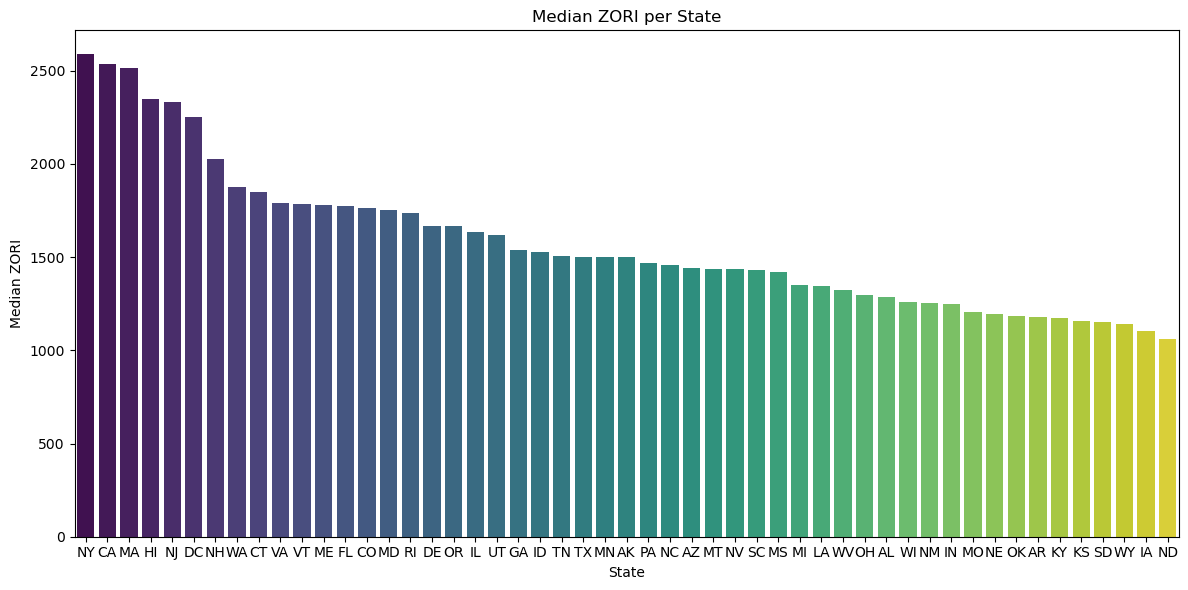

/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_4689/1342625952.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


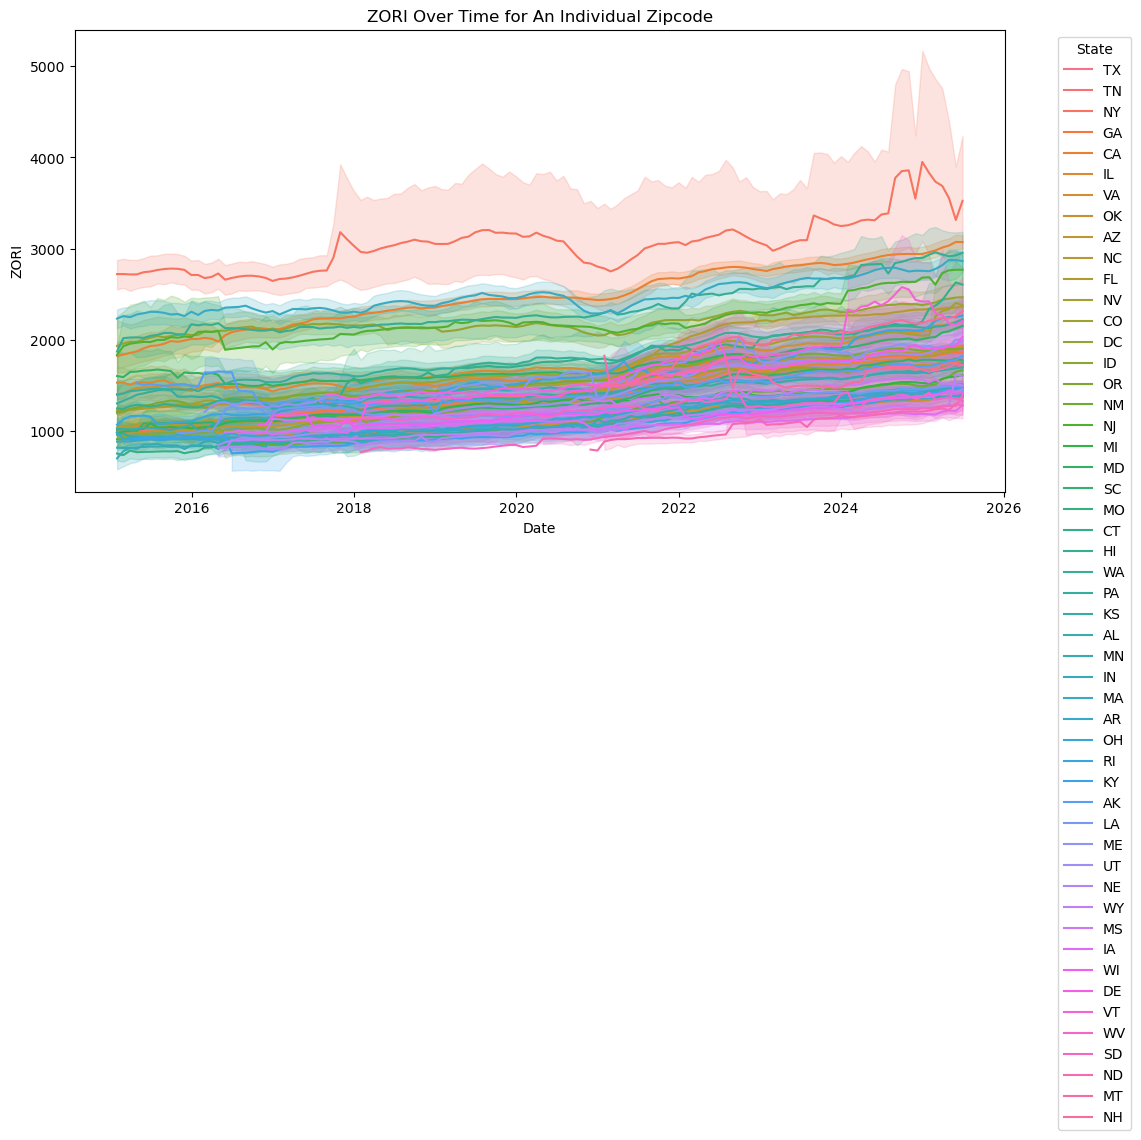

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

df_state = df.drop_duplicates()
table = df_state.pivot_table(index='State', values='RegionName', aggfunc='count')
table = table.sort_values('RegionName', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=table, x='State', y='RegionName', palette='viridis')
plt.title('Number of Unique ZIP Codes per State')
plt.xlabel('State')
plt.ylabel('Number of ZIP Codes')
plt.tight_layout()
plt.show()

df_cleaned['year'] = df_cleaned['date'].dt.year

df_cleaned['month'] = df_cleaned['date'].dt.month_name()

df_specific = df_cleaned[(df_cleaned['year'] == 2025) & (df_cleaned['month'] =='June') & (df_cleaned['state'].isin(['TX', 'CA', 'NY']))]

sns.histplot(data=df_specific, x='zori', hue='state', multiple='layer', kde=True)
plt.title('ZORI by State')
plt.xlabel('ZORI')
plt.xlim(0, 10000)
plt.show()

table_for_bar = df_cleaned.pivot_table(index='state', values='zori', aggfunc='median')
table_for_bar = table_for_bar.sort_values('zori', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=table_for_bar, x='state', y='zori', palette='viridis')
plt.title('Median ZORI per State')
plt.xlabel('State')
plt.ylabel('Median ZORI')
plt.tight_layout()
plt.show()

individual_zipcode = df_cleaned.loc[df_cleaned['region_name'] == 78738]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='date', y='zori', hue='state')
plt.title('ZORI Over Time for An Individual Zipcode')
plt.xlabel('Date')
plt.ylabel('ZORI')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





### Analysis

Findings:
There are an uneven amount of data available per state. California, Texas and Florida by far have more data than the rest of the states, so certain analysis may be skewed towards those state's laws.

Between TX, CA and NY, most of their ZORI is normally distributed. However, NY is noticably skewed with some data reaching 10000. This means NY rent prices changes rapidly.

NY, CA and MA have the highest median ZORI, with ND having the lowest, which means ND likely has the lowest risk of gentrification

For most states, ZORI steadily increased, especially during covid

